In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gender_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [5]:
print(gender_sub.shape)
gender_sub.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
y_test = gender_sub.iloc[: , 1]
print(y_test)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [7]:
x = train_data.iloc[: , :]
print(x.shape)
x = train_data.drop(["Survived"], axis= 1)
y = train_data["Survived"]
x.head()
x_test = test_data.iloc[: , :]
print(x.shape)
print(x_test.shape)

(891, 12)
(891, 11)
(418, 11)


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<AxesSubplot:>

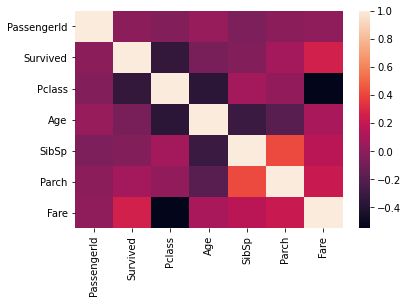

In [9]:
analisys_df = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1)

corr = train_data.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='Sex', ylabel='count'>

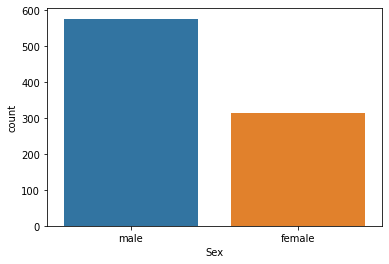

In [10]:
sns.countplot(x = 'Sex', data = train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 84.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

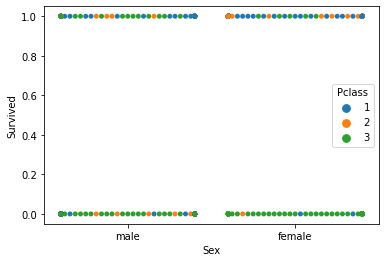

In [11]:
sns.swarmplot(x='Sex', y = 'Survived', data=train_data,
           hue='Pclass')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

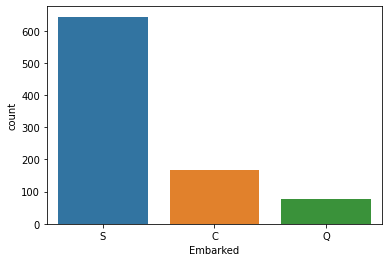

In [12]:
sns.countplot(x = 'Embarked', data = train_data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

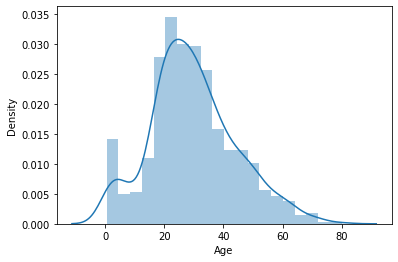

In [13]:
sns.distplot(analisys_df.Age)

(1.0, 180.0)

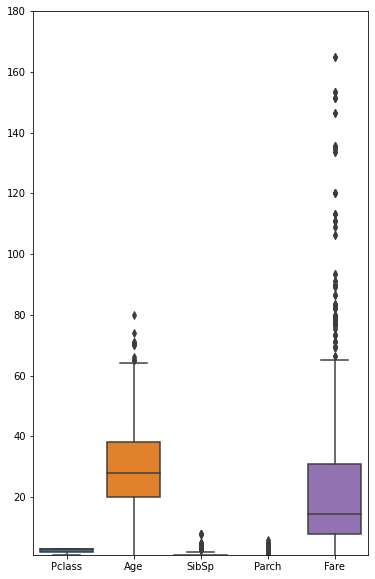

In [14]:
fig, ax = plt.subplots(figsize=(6,10))
sns.boxplot(data = analisys_df)
plt.ylim(1,180)

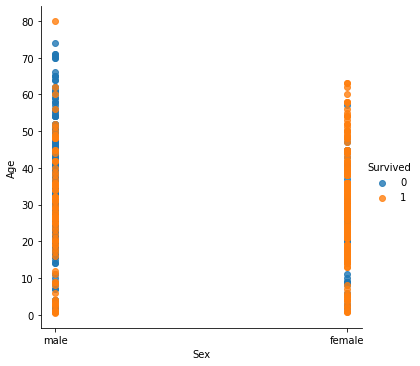

In [15]:
sns.lmplot(x='Sex', y = 'Age', data=train_data,
           fit_reg=False, 
           hue='Survived')

(0.0, 250.0)

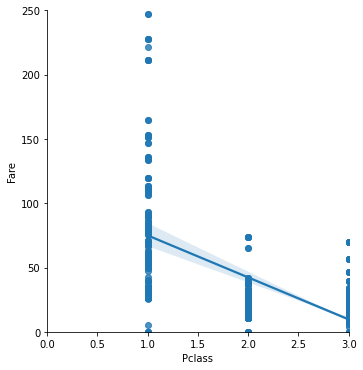

In [16]:
sns.lmplot(x = 'Pclass', y = 'Fare', data = analisys_df)

plt.xlim(0,3)
plt.ylim(0,250)

In [17]:
missing_val = train_data.isnull().sum()
missing_val_test = test_data.isnull().sum()
print(missing_val[missing_val > 0])
print(missing_val_test[missing_val_test > 0])

x = x.drop(["Cabin"], axis = 1)


Age         177
Cabin       687
Embarked      2
dtype: int64
Age       86
Fare       1
Cabin    327
dtype: int64


In [18]:
x = x.drop(["Ticket"], axis =1)
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [19]:
x['Family'] = x['Parch'] + x['SibSp']
x = x.drop(["Parch",  "SibSp"], axis = 1)

In [20]:
x = x.drop(["Pclass", "PassengerId", "Name"], axis = 1)

print(x.shape)

(891, 5)


In [21]:
x_test['Family'] = test_data['Parch'] + test_data['SibSp']
x_test = test_data.drop(['Pclass', 'Name', 'Parch', 'SibSp', 'Cabin', 'Ticket', 'PassengerId'], axis = 1)

In [22]:
print(x_test.shape)
print(x.shape)

(418, 5)
(891, 5)


In [23]:
x.head()

,Sex,Age,Fare,Embarked,Family
0,male,22.0,7.2500,S,1
1,female,38.0,71.2833,C,1
2,female,26.0,7.9250,S,0
3,female,35.0,53.1000,S,1
4,male,35.0,8.0500,S,0


In [24]:
x_test.head()

,Sex,Age,Fare,Embarked,Family
0,male,34.5,7.8292,Q,0
1,female,47.0,7.0000,S,1
2,male,62.0,9.6875,Q,0
3,male,27.0,8.6625,S,0
4,female,22.0,12.2875,S,2


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

oe = ColumnTransformer(transformers = [("encoder", OrdinalEncoder(), [0])], remainder= "passthrough")

x = np.array(oe.fit_transform(x))

In [26]:
x_test = np.array(oe.fit_transform(x_test))

In [27]:
print(x.shape)
print(x_test.shape)

(891, 5)
(418, 5)


In [28]:
ohe = ColumnTransformer(transformers = [("encoder", OneHotEncoder(), [3])], remainder = 'passthrough')

x = np.array(ohe.fit_transform(x))

In [29]:
x_test = np.array(ohe.transform(x_test))

In [30]:
print(x.shape)
print(x_test.shape)

(891, 8)
(418, 8)


In [31]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputed_X_train = pd.DataFrame(imputer.fit_transform(x))


In [32]:
imputer_X_test = pd.DataFrame(imputer.fit_transform(x_test))

In [33]:
imputed_X_train.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,1.0,22.0,7.2500,1.0
1,1.0,0.0,0.0,0.0,0.0,38.0,71.2833,1.0
2,0.0,0.0,1.0,0.0,0.0,26.0,7.9250,0.0
3,0.0,0.0,1.0,0.0,0.0,35.0,53.1000,1.0
4,0.0,0.0,1.0,0.0,1.0,35.0,8.0500,0.0


In [34]:
imputed_X_train = imputed_X_train.astype('float64')
imputer_X_test = imputer_X_test.astype('float64')

In [35]:
print(imputed_X_train.shape)
print(imputer_X_test.shape)

(891, 8)
(418, 8)


In [36]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
imputed_X_train = sc.fit_transform(imputed_X_train)
imputer_X_test = sc.transform(imputer_X_test)

In [37]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(random_state = 0,learning_rate = 0.04, n_estimators = 100, subsample = 0.8)

classifier.fit(imputed_X_train, y)

prediction = classifier.predict(imputer_X_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, prediction)
print(cm)
accuracy_score(y_test, prediction)

[[256  10]
 [  9 143]]


0.9545454545454546

In [39]:
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : prediction})
output.to_csv("my_submission.csv", index = False)

Please share your opinion and/or tips. Looking forward to getting better 😀